## Analyse av topp 10 dager med høyest temperatur 

*Resultatet viser de ti varmeste dagene i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
- Sommeren 2014 var ekstremt varm: hele 9 av 10 varmeste dager forekom i juli 2014. 
- Lav nedbør: 6/10 dager hadde 0 mm nedbør, noe som ofte gir sterk soloppvarming (samsvarer altså med den høye temperaturen).
- Moderat vind: De fleste dagene hadde vindhastigheter på rundt 2 m/s.

**Tolkning:**
Analysen tyder på at 2014 var et unormalt varmt år i Oslo, spesielt i juli. Det høye antallet ekstremt varme dager på rad kan tyde på en varmebølge, som er et fenomen ofte knyttet til klimaendringer og økt global temperatur.

         Dato  Nedbør  Temperatur  Vindhastighet  Interpolert_Nedbør  \
0  2014-07-24     0.0        25.8            1.9                   0   
1  2014-07-26     0.0        25.6            2.0                   0   
2  2014-07-10     0.0        24.7            2.1                   0   
3  2014-07-25     0.5        24.5            1.7                   0   
4  2014-07-22     0.0        24.1            2.0                   0   
5  2012-05-26     0.0        23.8            4.0                   0   
6  2014-07-27     5.6        23.8            1.8                   0   
7  2014-07-23     1.8        23.7            1.9                   0   
8  2014-07-11     0.0        23.6            1.9                   0   
9  2014-07-12     0.0        23.2            2.0                   0   

   Interpolert_Temperatur  Interpolert_Vindhastighet  
0                       0                          0  
1                       0                          0  
2                       0                 

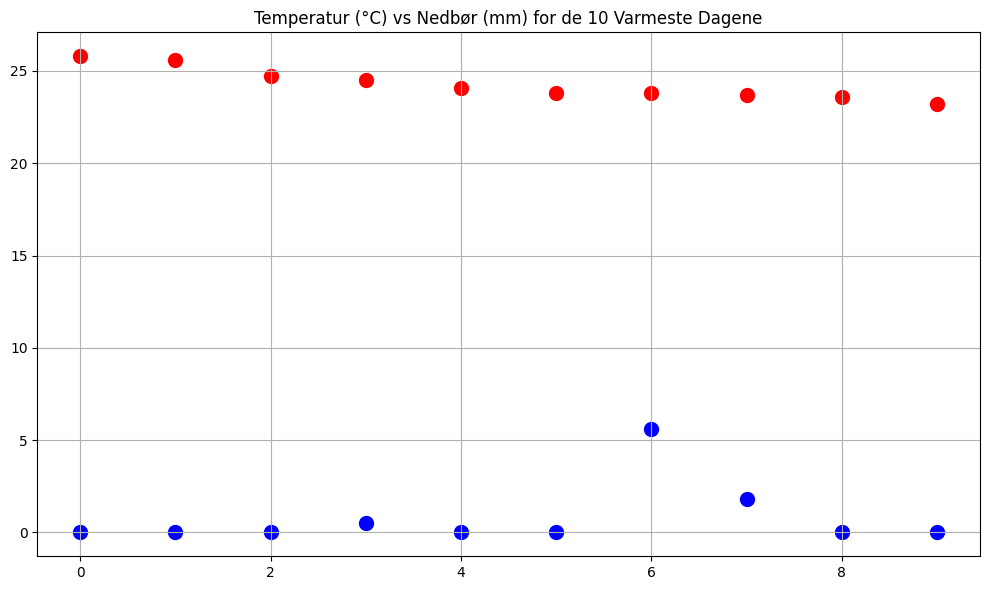

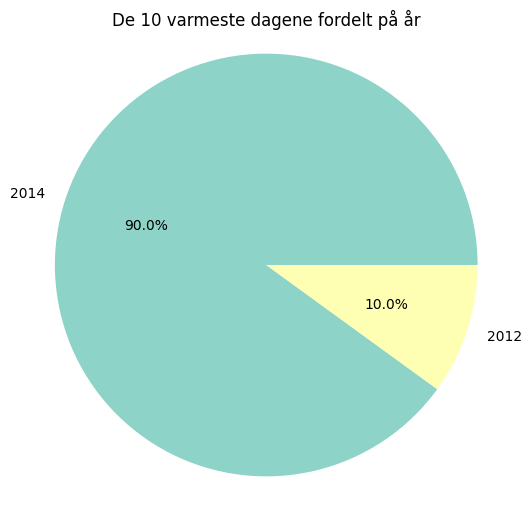

In [18]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/clean_data/frostAPI_clean_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# SQL-spørring for å finne de 10 dagene med høyest temperatur
query = """
    SELECT * 
    FROM df 
    ORDER BY Temperatur DESC 
    LIMIT 10
"""

result = psql.sqldf(query, locals())
print(result)


# Visualisering med scatterplot av temp vs nedbør
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
x = range(len(result))
plt.scatter(x, result['Temperatur'], color='red', label='Temperatur (°C)', s=100)
plt.scatter(x, result['Nedbør'], color='blue', label='Nedbør (mm)', s=100)
plt.title('Temperatur (°C) vs Nedbør (mm) for de 10 Varmeste Dagene')
plt.grid(True)
plt.tight_layout()
plt.show()


# Kakediagram for å vise fordelingen av de 10 varmeste dagene etter år
# Legger til en kolonne med år
result['År'] = pd.to_datetime(result['Dato']).dt.year

# Teller hvor mange ganger hvert år forekommer
år_telling = result['År'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    år_telling,
    labels=år_telling.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors 
)
plt.title("De 10 varmeste dagene fordelt på år")
plt.axis('equal')
plt.show()

## Analyse av topp 10 dager med lavest temperatur

*Resultatet viser de ti kaldeste dagene i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
- Fire av de 10 kaldeste dagene stammer fra 2010, noe som indikerer en spesielt kald vinter dette året.
- 9/10 av de kaldeste dagene forekom før 2014.

**Tolkning:**
Dataene fra 2010 til 2016 viser at ekstrme kuldedager forekom relativt hyppig i starten av perioden. Etter 2013 avtar dog antall ekstremt kalde dager, og den siste kuldedagen i listen er fra 2016. Dette kan tyde på en tendens mot mildere vintre, og indikere et gradvis varmere klima. 

         Dato  Temperatur
0  2010-12-22       -15.7
1  2010-12-23       -14.1
2  2013-01-14       -14.0
3  2010-12-08       -13.8
4  2013-01-23       -13.6
5  2010-12-09       -13.2
6  2011-02-13       -13.1
7  2011-02-21       -13.1
8  2016-01-15       -13.0
9  2012-12-04       -12.9


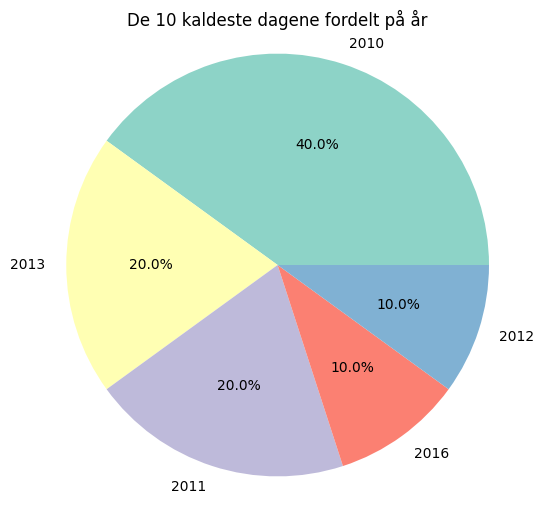

In [13]:
# SQL-spørring for å finne de 10 dagene med lavest temperatur
query = """
    SELECT Dato, Temperatur
    FROM df 
    ORDER BY Temperatur ASC 
    LIMIT 10
"""

result = psql.sqldf(query, locals())
print(result)



# Kakediagram for å vise fordelingen av de 10 kaldeste dagene etter år
# Legger til en kolonne med år
result['År'] = pd.to_datetime(result['Dato']).dt.year

# Teller hvor mange ganger hvert år forekommer blant de kaldeste dagene
år_telling = result['År'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    år_telling,
    labels=år_telling.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors 
)
plt.title("De 10 kaldeste dagene fordelt på år")
plt.axis('equal')
plt.show()


## Analyse av gjennomsnittlig temperatur per år 

*Resultatet viser gjennnomsnittstemperaturen per år i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Generell trend:**
Gjennomsnittstemperaturen per år i Oslo ser ut til å ha holdt seg relatvit stabilt de siste årene (et stabilt resultat på mellom 6 og 9 grader celcius). Dette kan indikere et relativt stabilit klima uten en klar stigende eller synkende trend over disse årene. 

**Avvik:**
Data for 2010 inkluderer bare perioden fra 1. april og ut året, noe som kan gjøre temperaturen høyere enn normalt årsgrunnlag siden vintermånedene mangler.

     År  Gjennomsnitt_temperatur
0  2010                 8.068613
1  2011                 7.441370
2  2012                 6.578689
3  2013                 6.768767
4  2014                 8.344384
5  2015                 7.674795
6  2016                 7.285205


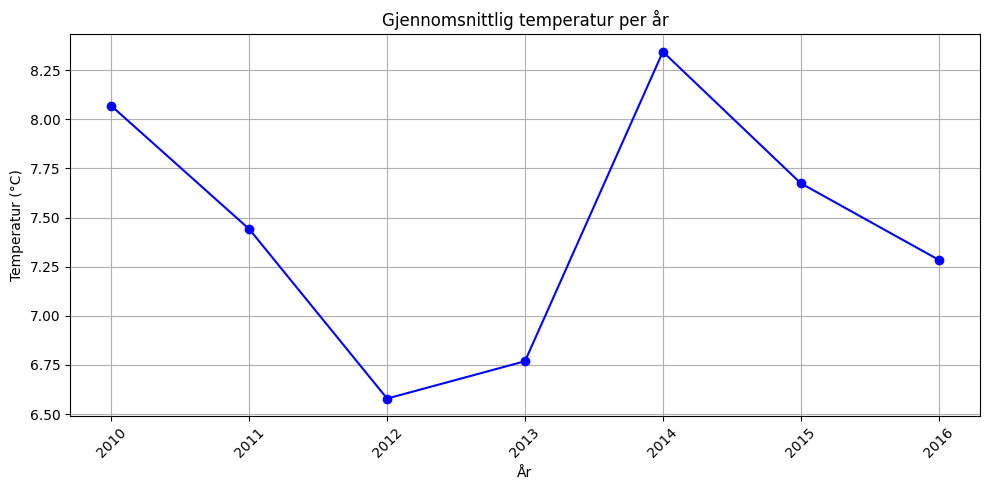

In [21]:
# SQL-spørring for å finne gjennomsnittlig temperatur per år
query = """
    SELECT strftime('%Y', Dato) AS År,
           AVG(Temperatur) AS Gjennomsnitt_temperatur
    FROM df
    GROUP BY År
    ORDER BY År
"""

result = psql.sqldf(query, locals())
print(result)


# Visualisering av gjennomsnittlig temperatur per år

plt.figure(figsize=(10, 5))
plt.plot(result['År'], result['Gjennomsnitt_temperatur'], marker='o', color='blue', linestyle='-')
plt.title("Gjennomsnittlig temperatur per år")
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gjennomsnittlig nedbør, temperatur og vindhastighet per uke 

*Viser gjennomsnittlig nedbør, temperatur og vindhastighet per uke i Oslo fra 2010-2016.*


          Uke  Avg_Nedbør  Avg_Temperatur  Avg_Vindhastighet
0    2010-U13    5.950000        3.000000           2.600000
1    2010-U14    0.642857        4.985714           2.300000
2    2010-U15    0.057143        7.728571           2.757143
3    2010-U16    0.014286        4.571429           2.671429
4    2010-U17    2.228571        7.742857           2.157143
..        ...         ...             ...                ...
353  2016-U48    0.028571        0.500000           2.028571
354  2016-U49    1.514286        1.657143           1.357143
355  2016-U50    0.671429       -1.428571           1.485714
356  2016-U51    0.571429        1.385714           2.642857
357  2016-U52    0.000000        1.333333           2.400000

[358 rows x 4 columns]


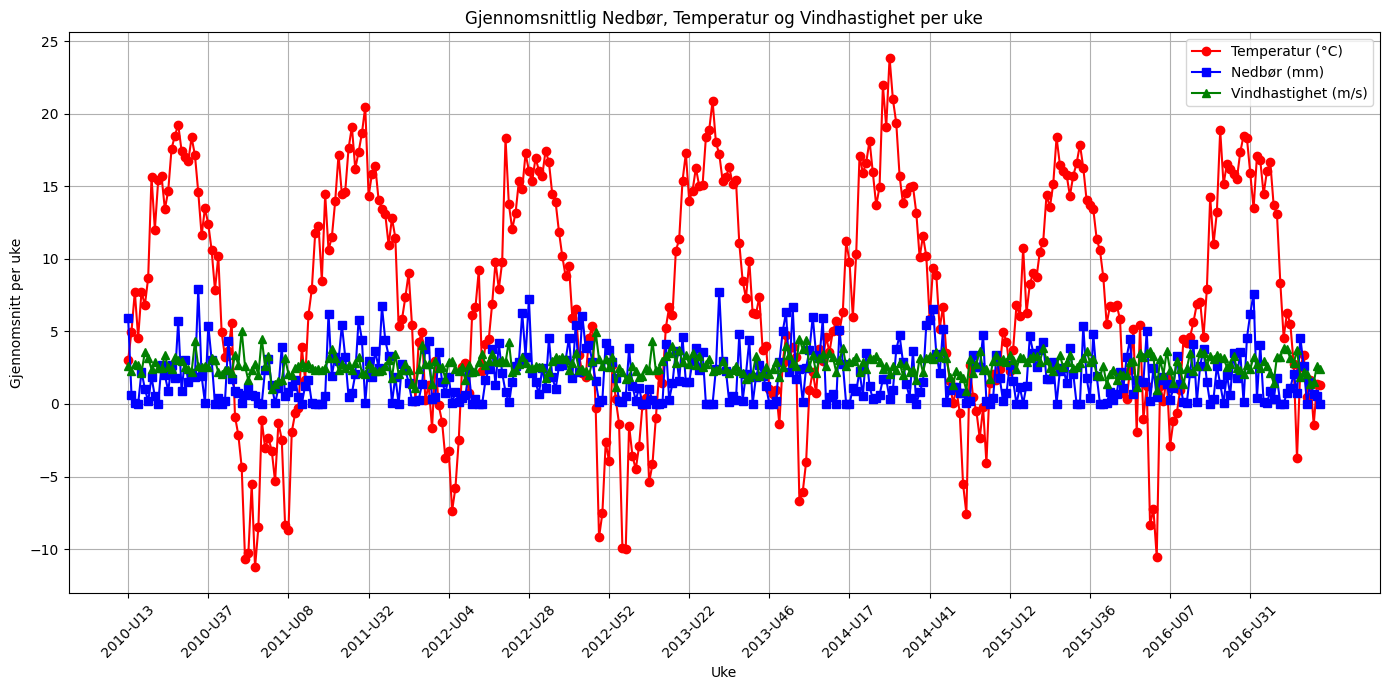

In [29]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/clean_data/frostAPI_clean_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Legger til en kolonne for uke
df['Uke'] = pd.to_datetime(df['Dato']).dt.strftime('%Y-U%U')

# SQL-spørring for å beregne gjennomsnitt per uke
query = """
    SELECT
        Uke,
        AVG(Nedbør) AS Avg_Nedbør,
        AVG(Temperatur) AS Avg_Temperatur,
        AVG(Vindhastighet) AS Avg_Vindhastighet
    FROM df
    GROUP BY Uke
    ORDER BY Uke
"""
result = psql.sqldf(query, locals())
print(result)

# Plotter resultatet 
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot temperatur (rød)
plt.plot(result['Uke'], result['Avg_Temperatur'], label='Temperatur (°C)', color='red', marker='o')
# Plot nedbør (blå)
plt.plot(result['Uke'], result['Avg_Nedbør'], label='Nedbør (mm)', color='blue', marker='s')
# Plot vindhastighet (grønn)
plt.plot(result['Uke'], result['Avg_Vindhastighet'], label='Vindhastighet (m/s)', color='green', marker='^')

plt.xlabel('Uke')
plt.ylabel('Gjennomsnitt per uke')
plt.title('Gjennomsnittlig Nedbør, Temperatur og Vindhastighet per uke')
plt.xticks(result['Uke'][::24], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyse av sammenhenger mellom vær og luftkvalitet

*Resultatet viser sammenhengen mellom graden av temperatur og O3 og graden av vindhastighet og NO2.*

**Korrelasjonsanalyse:**

Korrelasjonskoeffisenten ble beregenet med Pearson-metoden:
- Korrelasjon temp og O3 = 0,315
- Korrelasjon vindhastighet og NO2 = -0,56

En korrelasjon på 0,315 tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager - noe som kan ha konsekvenser for luftkvalitet.

En korrelasjon på -0,56 tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

**Visualisering:**


Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 


      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2460       -13.6  21.062500
2461       -13.8  59.408270
2462       -14.0  25.820833
2463       -14.1  59.841476
2464       -15.7  59.812595

[2465 rows x 2 columns]
      Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2460            0.6  62.052577
2461            0.6  78.366667
2462            0.6  78.195833
2463            0.6  88.712500
2464            0.6  48.716667

[2465 rows x 2 columns]
Korrelasjon mellom Temperatur og O3: 0.3152867638469338
Korrelasjon mellom Vindhastighet og NO2: -0.5601364794153099


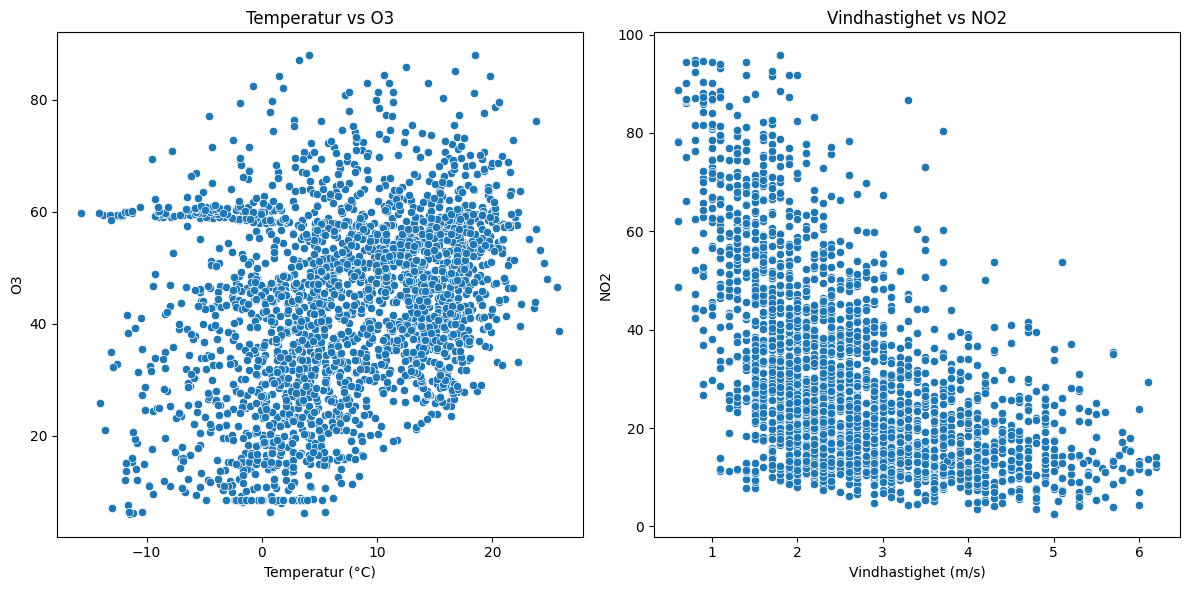

In [22]:
import json
# Lese inn de to JSON-filene
with open("../data/clean_data/frostAPI_clean_data.json", "r") as frost, open("../data/clean_data/niluAPI_clean_data.json", "r") as nilu:
    data1 = json.load(frost)
    data2 = json.load(nilu)

# Konvertere til DataFrames
df1 = pd.json_normalize(data1)
df2 = pd.json_normalize(data2)

merged_df = pd.merge(df1, df2, on="Dato", how="inner")  

# SQL-spørring for å undersøke sammenhengen mellom temperatur og O3-nivå
query = """
SELECT Temperatur, Verdi_O3
FROM merged_df
WHERE Temperatur IS NOT NULL AND Verdi_O3 IS NOT NULL
ORDER BY Temperatur DESC
"""
result = psql.sqldf(query, locals())
print(result)

# SQL-spørring for å undersøke sammenhengen mellom vindhastighet og NO2-nivå
query2 = """
SELECT Vindhastighet, Verdi_NO2
FROM merged_df
WHERE Vindhastighet IS NOT NULL AND Verdi_NO2 IS NOT NULL
ORDER BY Vindhastighet DESC
"""
result2 = psql.sqldf(query2, locals())
print(result2)

# Bruker pearson-korrelasjon for å undersøke sammenhengen mellom temperatur og O3-nivå, samt vindhastighet og NO2-nivå
# Lager ny df med relevante kolonner og dropper NaN-verdier
df_analyse = merged_df[['Temperatur', 'Verdi_O3', 'Vindhastighet', 'Verdi_NO2']].dropna()
# Beregner korrelasjonene
korrelasjon_temp_o3 = df_analyse["Temperatur"].corr(df_analyse["Verdi_O3"], method='pearson')
korrelasjon_vind_no2 = df_analyse["Vindhastighet"].corr(df_analyse["Verdi_NO2"], method='pearson')

print(f"Korrelasjon mellom Temperatur og O3: {korrelasjon_temp_o3}")
print(f"Korrelasjon mellom Vindhastighet og NO2: {korrelasjon_vind_no2}")


#Visualisering av korrelasjonen 
import seaborn as sns
plt.figure(figsize = (12, 6))

# Temperatur vs O₃
plt.subplot(1, 2, 1)
sns.scatterplot(x = "Temperatur", y = "Verdi_O3", data = df_analyse)
plt.title("Temperatur vs O3")
plt.xlabel("Temperatur (°C)")
plt.ylabel("O3")

# Vindhastighet vs NO₂
plt.subplot(1, 2, 2)
sns.scatterplot(x = "Vindhastighet", y = "Verdi_NO2", data = df_analyse)
plt.title("Vindhastighet vs NO2")
plt.xlabel("Vindhastighet (m/s)")
plt.ylabel("NO2")

plt.tight_layout()
plt.show()

## Variasjon i værdata: Standardvik for nedbør, temperatur og vindhastighet

*Regner standardavviket til hele datasettet og standardavvik per uke (frostAPI) for nedbør, temperatur og vindhastighet.*

Standardavvik gir en indikasjon på hvor mye variasjon det er i værdataen.


In [ ]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/clean_data/frostAPI_clean_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# SQL-spørring for å beregne standardavvik for hele datasettet
query = """
    SELECT
        SQRT(SUM((Nedbør - (SELECT AVG(Nedbør) FROM df)) * 
                  (Nedbør - (SELECT AVG(Nedbør) FROM df))) / 
                  (COUNT(Nedbør) - 1)) AS StdDev_Nedbør,
        SQRT(SUM((Temperatur - (SELECT AVG(Temperatur) FROM df)) * 
                  (Temperatur - (SELECT AVG(Temperatur) FROM df))) / 
                  (COUNT(Temperatur) - 1)) AS StdDev_Temperatur,
        SQRT(SUM((Vindhastighet - (SELECT AVG(Vindhastighet) FROM df)) * 
                  (Vindhastighet - (SELECT AVG(Vindhastighet) FROM df))) / 
                  (COUNT(Vindhastighet) - 1)) AS StdDev_Vindhastighet
    FROM df
"""
result = psql.sqldf(query, locals())
result

,StdDev_Nedbør,StdDev_Temperatur,StdDev_Vindhastighet
0,5.241123,7.932812,1.159046


In [9]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/clean_data/frostAPI_clean_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Legger til en kolonne for uke
df['Uke'] = pd.to_datetime(df['Dato']).dt.strftime('%Y-U%U')

# SQL-spørring for å beregne standardavvik per uke
query = """
    SELECT
        Uke,
        SQRT(SUM((Nedbør - (SELECT AVG(Nedbør) FROM df WHERE Uke = df.Uke)) * 
                  (Nedbør - (SELECT AVG(Nedbør) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Nedbør) - 1)) AS StdDev_Nedbør,
        SQRT(SUM((Temperatur - (SELECT AVG(Temperatur) FROM df WHERE Uke = df.Uke)) * 
                  (Temperatur - (SELECT AVG(Temperatur) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Temperatur) - 1)) AS StdDev_Temperatur,
        SQRT(SUM((Vindhastighet - (SELECT AVG(Vindhastighet) FROM df WHERE Uke = df.Uke)) * 
                  (Vindhastighet - (SELECT AVG(Vindhastighet) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Vindhastighet) - 1)) AS StdDev_Vindhastighet
    FROM df
    GROUP BY Uke
    ORDER BY Uke
"""
result = psql.sqldf(query, locals())
result

,Uke,StdDev_Nedbør,StdDev_Temperatur,StdDev_Vindhastighet
0,2010-U13,7.176128,6.269313,0.438051
1,2010-U14,1.809510,3.012779,1.128083
2,2010-U15,1.990479,0.858714,1.333041
3,2010-U16,2.031372,3.392558,0.593648
4,2010-U17,4.677514,1.529086,0.855339
...,...,...,...,...
353,2016-U48,2.017007,7.894667,1.387948
354,2016-U49,3.897463,6.824489,1.492936
355,2016-U50,2.010311,9.806934,1.511311
356,2016-U51,1.708342,6.958214,1.296492
